# <font color='red'> Phase Diagram of a Harmonic Oscillator </font>

## 1. Using Arrays

### * The equation of motion for a harmonic oscillator is $\dot{x}=\frac{p}{m}$ and $\dot{p}=-m \omega^2 x$. Lets solve this with first order solver.

In [1]:
from matplotlib import pyplot as plt # We need this package to plot figures.

In [2]:
def Simple_Evolve_SHO(x,p,δt,m,ω): # Returns ẋ and ṗ for SHO.
    dx = (p/m)*δt
    dp = -m*(ω**2)*x*δt
    return dx,dp

In [3]:
# TEST as you write...
dx,dp=Simple_Evolve_SHO(2,1,1e-4,1,1)
dx,dp

(0.0001, -0.0002)

### * Do not use for Loops unless you need to. Lets see this in action by first building a "loopy way" of evaluating all this.

In [4]:
def Evolve_Many_Times(x0,p0,δt,m,ω,num):
        x=[] # Empty arrays, so that you can store x and p. Remove this and see the error python will throw.
        p=[] # Empty arrays, so that you can store x and p. Remove this and see the error python will throw.
        x.append(x0) # Append function simply adds a given entry, x0 here, as the last entry to the list.
        p.append(p0) # APPEND IS A METHOD, which means that you use .append() method to do things. This should remind you of Object Oriented Programming...
        for i in range(1,num): # WHY did I write range(1,num) and not just range(num)?
            δx,δp = Simple_Evolve_SHO(x[-1],p[-1],δt,m,ω)
            x.append(x[-1]+δx)
            p.append(p[-1]+δp)
        return x,p

In [5]:
x0=.0
p0=.01
x,p=Evolve_Many_Times(x0,p0,1e-5,1,1,10**6)

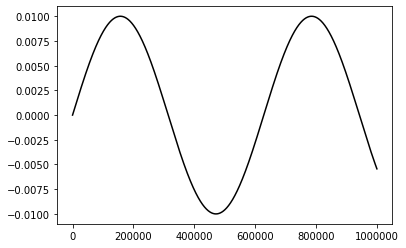

In [7]:
# Notice that this is a quick way to plot x,
# since I did not give the x-axis, plt plots x on the y-axis vs. array number on the x-axis.
plt.plot(x,'k') 

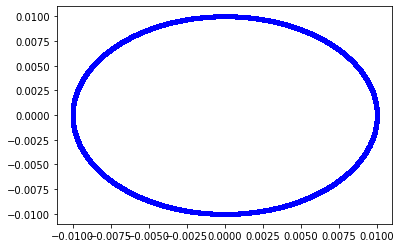

In [8]:
plt.plot(x,p,'b.')
#plt.axes().set_aspect('equal', 'datalim')

In [9]:
for i in range(6):
        %timeit Evolve_Many_Times(x0,p0,1e-5,1,1,10**i)

563 ns ± 2.36 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
7.94 µs ± 30.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
80 µs ± 123 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
814 µs ± 3.22 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
8.18 ms ± 41.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
85.4 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


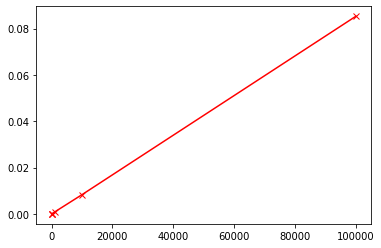

In [10]:
#IF you plot it, there is a bunch of points at the origin...
plt.plot([1,10,100,1000,10000,100000],[615*1e-9,8.06*1e-6,81.6*1e-6,818*1e-6,8.3*1e-3,85.3*1e-3],'rx-')

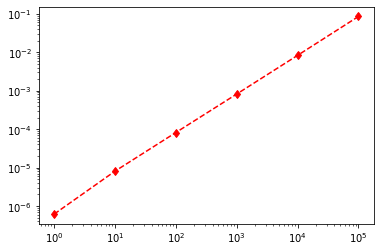

In [11]:
# Use semilogy or loglog to visualize this better
plt.loglog([1,10,100,1000,10000,100000],[615*1e-9,8.06*1e-6,81.6*1e-6,818*1e-6,8.3*1e-3,85.3*1e-3],'rd--')

## We learnt from the basic numpy notebook that numpy typically is better at this stuff. So lets see if we can make things better?

# 3. Using Integrators 
#### (see https://flothesof.github.io/harmonic-oscillator-three-methods-solution.html)

In [14]:
import numpy as np

In [15]:
def deriv(u, t, omega_squared):
    "Provides derivative of vector u."
    xdot, x = u
    return [-omega_squared * x, xdot]

In [16]:
snapshot_dt = 0.3
ts = np.arange(0, 12, snapshot_dt)

In [19]:
y0 = [0, 1]
odeint?

In [18]:
from scipy.integrate import odeint
scipysol = odeint(deriv, y0, ts, args=(1,))

In [20]:
scipysol

array([[ 0.        ,  1.        ],
       [-0.29552019,  0.95533649],
       [-0.56464245,  0.82533562],
       [-0.78332689,  0.62160999],
       [-0.93203906,  0.36235779],
       [-0.99749497,  0.07073726],
       [-0.97384763, -0.22720201],
       [-0.8632094 , -0.504846  ],
       [-0.67546325, -0.73739361],
       [-0.42737999, -0.90407206],
       [-0.14112013, -0.98999246],
       [ 0.15774557, -0.98747978],
       [ 0.44252033, -0.89675847],
       [ 0.68776606, -0.72593239],
       [ 0.87157571, -0.49026094],
       [ 0.9775301 , -0.21079593],
       [ 0.99616464,  0.08749885],
       [ 0.92581475,  0.37797762],
       [ 0.7727646 ,  0.63469278],
       [ 0.55068568,  0.83471273],
       [ 0.27941565,  0.96017028],
       [-0.01681375,  0.99985869],
       [-0.31154124,  0.95023269],
       [-0.57843967,  0.81572524],
       [-0.79366782,  0.60835148],
       [-0.93799999,  0.34663549],
       [-0.99854342,  0.05395559],
       [-0.96988995, -0.24354401],
       [-0.85459909,

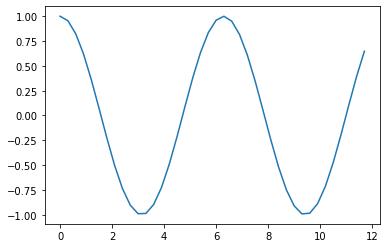

In [21]:
plt.plot(ts, scipysol[:, 1])

# 4. Doing things Smartly. Exponential of the evolution operator.

In [22]:
import numpy as np
from scipy.linalg import expm # This is the "exponential of an operator" function

In [26]:
expm?

In [27]:
expm(np.zeros((2,2)))

array([[1., 0.],
       [0., 1.]])

# Notice that you can write $\vec{z}(t)=e^{Mt}\vec{z}(0)$

In [28]:
def Integrate_Using_Exp(δt,m,ω):
        M=np.array([[0,1/m],[-m*(ω**2),0]]) # Evaluate the matrix
        Evolution=expm(M*δt) # Evaluate its exponential
        return Evolution # Return it.

In [29]:
z0=np.random.rand(2,1) # Initialize the phase trajectory somewhere random in the unit circle.
z0

array([[0.17945632],
       [0.09098259]])

In [30]:
U=Integrate_Using_Exp(1e-5,1,1)
U

array([[ 1.e+00,  1.e-05],
       [-1.e-05,  1.e+00]])

In [31]:
def Evolve_Using_Numpy(U,z0,num):
    x=np.zeros(num)
    p=np.zeros(num)
    z=z0
    for i in range(num):
        x[i]=z[0]
        p[i]=z[1]
        z = U.dot(z)
        
    return(x,p)

In [32]:
Evolve_Using_Numpy(U,z0,10**5)

(array([0.17945632, 0.17945723, 0.17945814, ..., 0.17352293, 0.17352191,
        0.17352089]),
 array([ 0.09098259,  0.09098079,  0.090979  , ..., -0.10184398,
        -0.10184571, -0.10184745]))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


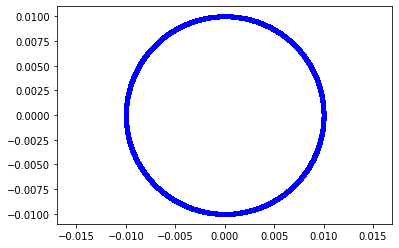

In [33]:
plt.plot(x,p,'b.')
plt.axes().set_aspect('equal', 'datalim')

In [34]:
for i in range(6):
        %timeit Evolve_Using_Numpy(U,z0,10**i)

3.21 µs ± 36.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
13.9 µs ± 134 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
117 µs ± 616 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.17 ms ± 5.99 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
11.6 ms ± 99.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
116 ms ± 558 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Comparing with before, nothing good seems to have been achieved. 
# Reason for that is we are not using vectorization properly. 
# We are still going through loops.

In [35]:
for i in range(6):
        %timeit Evolve_Many_Times(x0,p0,1e-5,1,1,10**i)

587 ns ± 12 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
8.11 µs ± 214 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
79.9 µs ± 745 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
815 µs ± 9.22 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
8.17 ms ± 43 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
84.1 ms ± 566 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
z0

In [ ]:
U

In [36]:
from numpy.linalg import matrix_power
matrix_power(U, 2).dot(z0).transpose()

array([[0.17945814, 0.090979  ]])

In [37]:
def Evolve_Using_Numpy_List_Comp(U,z0,num): # I have added List_Comp for list comprehension
    Z=[(matrix_power(U, i)).dot(z0).transpose() for i in range(num)]
    return Z

In [38]:
Z=Evolve_Using_Numpy_List_Comp(U,z0,5)

In [39]:
for i in range(5):
    %timeit Evolve_Using_Numpy_List_Comp(U,z0,10**i)

8.22 µs ± 41.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
111 µs ± 266 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.07 ms ± 36.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
33.2 ms ± 1.96 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
433 ms ± 12.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Still no speedup. So whats happening?
## <font color='Green'> Conjecture: Still using loops. Not using UFUNCS or other builtin methods..runtime checks are the bottleneck... </font>

In [ ]:
Dim = 10


In [ ]:
δt=1e-5
F = np.random.rand(Dim,Dim) +1j*np.random.rand(Dim,Dim) 
Fd=F.conj().T
H=F.dot(Fd)
U=expm(-1j*H*δt)

In [ ]:
z0=np.random.rand(Dim)

In [ ]:
U.dot(z0)

In [ ]:
for i in range(5):
    %timeit Evolve_Using_Numpy_List_Comp(U,z0,10**i)

# EXERCISES: 
## [1] Investigate the conjecture.
## [2] Write a code to solve time dependant phase trajectory for damped SHO $\ddot{x}+\omega^2 x+\dot{x}=\epsilon\cos(\omega_d t)$

In [ ]:
import numpy as np

In [40]:
z0=np.array([1,0])

In [41]:
θ=np.pi/3
M=np.array([[np.cos(θ),np.sin(θ)],[-np.sin(θ),np.cos(θ)]])

In [42]:
def Repeat_Mul(M,z0,n):
    if n==1:
        return z0
    else:
        return M@Repeat_Mul(M,z0,n-1)

In [43]:
for i in range(4):
    %timeit Repeat_Mul(M,z0,10**i) # Memory issues

163 ns ± 0.131 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
15.5 µs ± 122 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
163 µs ± 1.52 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.67 ms ± 14.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [44]:
def Repeat_Mul_2(M,z0,n):
    if n==1:
        return z0
    else:
        for i in range(1,n+1):
            z0 = M@z0
        return z0    

In [45]:
for i in range(5):
    %timeit Repeat_Mul_2(M,z0,10**i) # Memory issues

160 ns ± 0.693 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
15.7 µs ± 172 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
145 µs ± 1.02 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.44 ms ± 3.17 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
14.8 ms ± 370 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
Repeat_Mul_2(M,z0,136)